<a href="https://colab.research.google.com/github/marcos626/control_systems_Ogata/blob/master/02_Introduction_LCR_circuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LCR Circuit

### author: Juan M. Acevedo-Valle
### date: Feb/2018
### modified: Dec/2018

In [ ]:
%matplotlib inline
# Import libraries we will be using in this session
import control
from control import ss, tf
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0,6.0)
matplotlib.rcParams.update({'font.size': 12, 'font.weight': 'bold'})

In [ ]:
# System parameters
R = 1 #Ohms
C = 0.5 #Farads
L = 1 #Henries

In [ ]:
#Transfer function from voltage source to current I(S)/V(S)
num = [1, 0]
den = [L,R,1/C]
tf_lcr = tf(num,den)
print(tf_lcr)


     s
-----------
s^2 + s + 2



Text(0,0.5,'Current [A]')

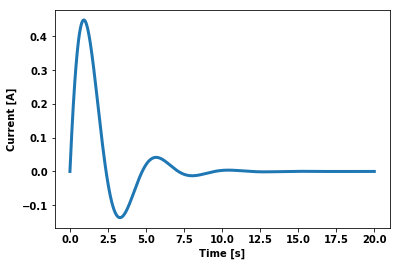

In [ ]:
#Step response to step with tf
T = np.linspace(0,20,1000)
T, y_step = control.step_response(tf_lcr,T)
plt.plot(T,y_step,lw = 3)
plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Current [A]", weight = 'bold')

Text(0.5,0,'Time [s]')

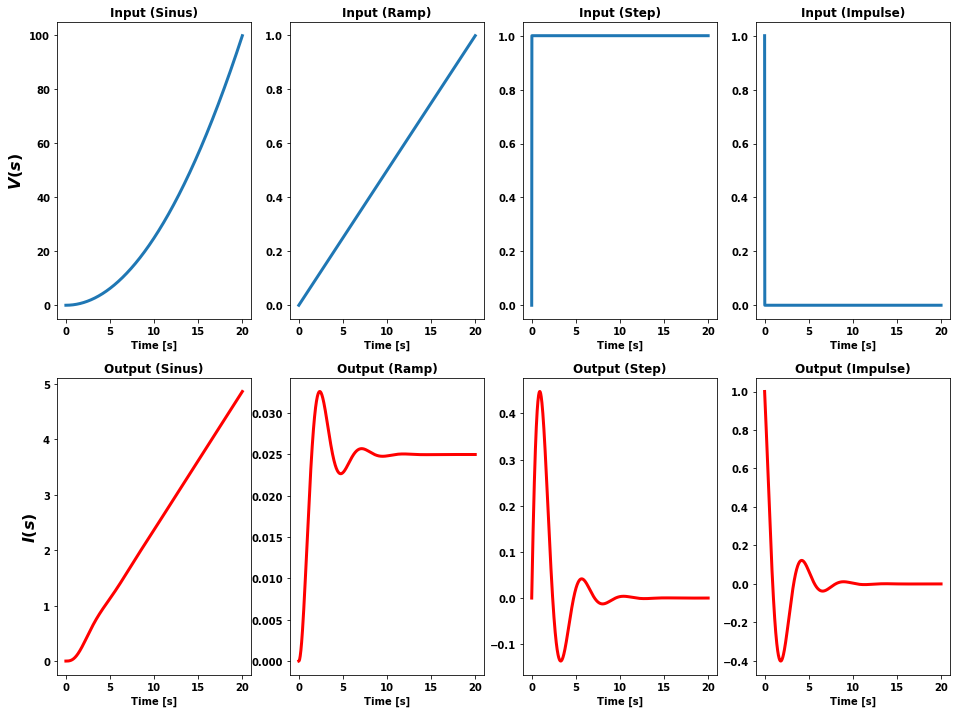

In [ ]:
#Response to other inputs
matplotlib.rcParams['figure.figsize'] = (16.0,12.0)

U1 = np.sin(0.01 * np.array(range(1000))) #Sinus
U1 = np.power(0.01 * np.array(range(1000)),2) #Parabolic
Uramp = 0.001 * np.array(range(1000)) #Sharp
T, y_U1, foo = control.forced_response(tf_lcr,T,U1)
T, y_Uramp, foo = control.forced_response(tf_lcr,T,Uramp)
T, y_impulse = control.impulse_response(tf_lcr,T)

fig, ax = plt.subplots(2,4)
plt.sca(ax[0,0])
plt.title("Input (Sinus)", weight = 'bold')
plt.plot(T,U1,lw=3)
plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("$V(s)$", weight = 'bold', size=16)

plt.sca(ax[1,0])
plt.title("Output (Sinus)", weight = 'bold')
plt.plot(T,y_U1,lw=3, c = 'red')
plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel('$I(s)$', weight = 'bold', size=16)

plt.sca(ax[0,1])
plt.title("Input (Ramp)", weight = 'bold')
plt.plot(T,Uramp,lw=3)
plt.xlabel("Time [s]", weight = 'bold')

plt.sca(ax[1,1])
plt.title("Output (Ramp)", weight = 'bold')
plt.plot(T,y_Uramp,lw=3, c = 'red')
plt.xlabel("Time [s]", weight = 'bold')

plt.sca(ax[0,2])
plt.title("Input (Step)", weight = 'bold')
plt.plot(T,[0.]+[1.]*999,lw=3)
plt.xlabel("Time [s]", weight = 'bold')

plt.sca(ax[1,2])
plt.title("Output (Step)", weight = 'bold')
plt.plot(T,y_step,lw=3, c = 'red')
plt.xlabel("Time [s]", weight = 'bold')

plt.sca(ax[0,3])
plt.title("Input (Impulse)", weight = 'bold')
plt.plot(T,[1.]+[0.]*999,lw=3)
plt.xlabel("Time [s]", weight = 'bold')

plt.sca(ax[1,3])
plt.title("Output (Impulse)", weight = 'bold')
plt.plot(T,y_impulse,lw=3, c = 'red')
plt.xlabel("Time [s]", weight = 'bold')


In [ ]:
# State space (x1 = v_c, x2 = dv_c/dt)
A = np.array([[0,1],[-1/(L*C),-R/L]])
B = np.array([[0], [1/(L*C)]])
Cy = np.array([[1,0],[0,C]])
Dy = np.array([[0],[0]])
ss_lcr = ss(A,B,Cy,Dy)
print(ss_lcr)

A = [[ 0.  1.]
 [-2. -1.]]

B = [[0.]
 [2.]]

C = [[1.  0. ]
 [0.  0.5]]

D = [[0]
 [0]]



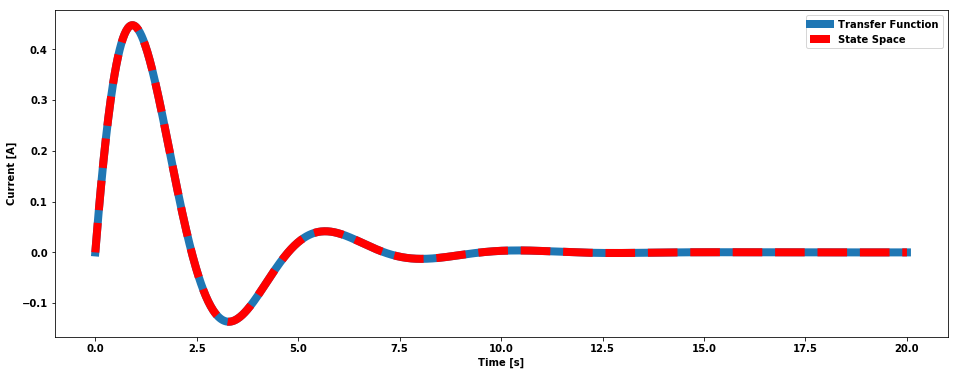

In [ ]:
#Time response to step with ss
T, y_step_ss = control.step_response(ss_lcr,T)
matplotlib.rcParams['figure.figsize'] = (16.0,6.0)

plt.plot(T,y_step,lw = 8)
plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Current [A]", weight = 'bold')
plt.plot(T,y_step_ss[1], lw=8, color='r',linestyle='--')
plt.legend(['Transfer Function','State Space'])

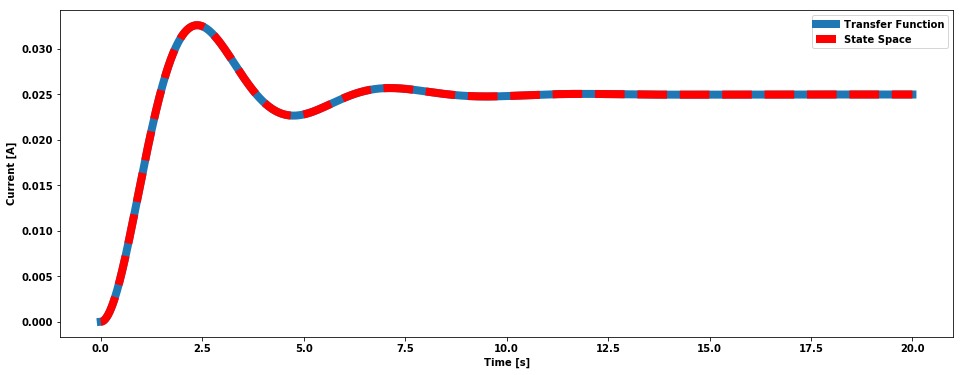

In [ ]:
# State space (x1 = v_c, x2 = i)
A = np.array([[0,1/C],[-1/L,-R/L]])
B = np.array([[0], [1/L]])
Cy = np.array([[1,0],[0,1]])
Dy = np.array([[0],[0]])

ss_lcr2 = ss(A,B,Cy,Dy)
T, y_step_ss2, foo = control.forced_response(ss_lcr2,T,Uramp)

plt.plot(T,y_Uramp,lw = 8)
plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Current [A]", weight = 'bold')
plt.plot(T,y_step_ss2[1], lw=8, color='r',linestyle='--')
plt.legend(['Transfer Function','State Space'])

In [ ]:
#Obtaining transfer functions from State Space representation (A lot of information)
tf_from_ss = control.ss2tf(ss_lcr2)
print(tf_from_ss.num[1])

[array([1., 0.])]


Text(0,0.5,'Voltage [V]')

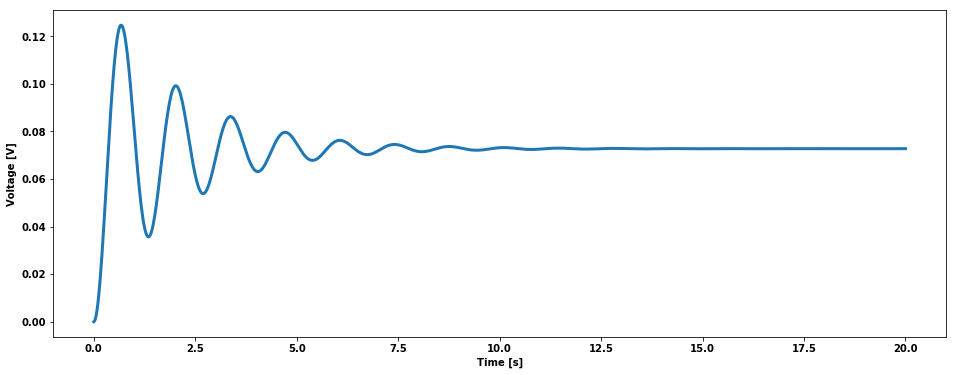

In [ ]:
#Closing the loop with the toolbox
K=10
cl_tf = control.feedback(tf(tf_from_ss.num[0][0],tf_from_ss.den[0][0]),K)
# print(cl_tf)
#Step response to step with tf
U = np.array([0.8]*1000)
T, y_cl_step, foo = control.forced_response(cl_tf,T,U)
plt.plot(T,y_cl_step,lw = 3)
plt.xlabel("Time [s]", weight = 'bold')
plt.ylabel("Voltage [V]", weight = 'bold')

In [ ]:
tf_from_ss.num[0][0]

array([2.])